<a href="https://colab.research.google.com/github/subbu27iitb/Regression/blob/main/RegMFI_LLFILM_INDO_Rev02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRN1 - Only LLFILM & LL ROTO- Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRN1 MFI_LLFILM.csv to TRN1 MFI_LLFILM.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.layers import normalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras import initializers
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.initializers import HeUniform

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import DistanceMetric

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("TRN1 MFI_LLFILM.csv")
print(df.shape)
print(df.head())
df.describe()
df.head()

(1751, 12)
    II1126.PV  XI1400A.PV   TI1129-PV  XI1403A-PV  Tot CAT Flow   Tot H2 Flow  \
0  165.818222  200.623566  274.237274    0.256131     15.431849  0.000000e+00   
1  164.401520  200.509186  275.174133    0.254841     16.082146  1.587558e+00   
2  165.910339  200.508789  275.571350    0.268407     17.758253  1.447317e+00   
3  165.422287  201.735290  276.307739    0.273027     16.746458  1.528968e+00   
4  165.271225  190.190124  257.639374    0.559138     12.269920  1.000000e-28   

   PDI1140.PV  #1 Sieve DP  TI4304A.PV  #1 Extrdr Die DP   II3349A.PV  \
0    4.917679     1.802371  209.730316         18.324406  1179.207153   
1    4.636374     1.719614  209.021317         17.833794  1131.535278   
2    5.042731     1.497538  208.739441         18.333740  1161.953979   
3    5.518978     1.735398  209.958557         18.776360  1221.541382   
4    6.069134     4.232919  205.741821         29.726685  1840.439575   

   TRN1-MFI  
0      4.40  
1      4.60  
2      4.60  
3      

,II1126.PV,XI1400A.PV,TI1129-PV,XI1403A-PV,Tot CAT Flow,Tot H2 Flow,PDI1140.PV,#1 Sieve DP,TI4304A.PV,#1 Extrdr Die DP,II3349A.PV,TRN1-MFI
0,165.818222,200.623566,274.237274,0.256131,15.431849,0.000000e+00,4.917679,1.802371,209.730316,18.324406,1179.207153,4.40
1,164.401520,200.509186,275.174133,0.254841,16.082146,1.587558e+00,4.636374,1.719614,209.021317,17.833794,1131.535278,4.60
2,165.910339,200.508789,275.571350,0.268407,17.758253,1.447317e+00,5.042731,1.497538,208.739441,18.333740,1161.953979,4.60
3,165.422287,201.735290,276.307739,0.273027,16.746458,1.528968e+00,5.518978,1.735398,209.958557,18.776360,1221.541382,4.60
4,165.271225,190.190124,257.639374,0.559138,12.269920,1.000000e-28,6.069134,4.232919,205.741821,29.726685,1840.439575,1.19


In [ ]:
#X1 = df.drop('TRN1-MFI', axis =1)
X = df.drop(['TRN1-MFI','Tot H2 Flow'], axis=1)
y  = df['TRN1-MFI']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 20)
X_train.shape
X.shape
y.head()
X_test.head()

,II1126.PV,XI1400A.PV,TI1129-PV,XI1403A-PV,Tot CAT Flow,PDI1140.PV,#1 Sieve DP,TI4304A.PV,#1 Extrdr Die DP,II3349A.PV
250,170.670181,188.260925,255.072250,0.485070,14.959161,13.214743,3.908633,202.083954,31.055107,1999.513306
1494,168.632752,203.015869,253.429398,0.480972,23.230839,7.925876,3.967751,185.922394,23.613678,1234.061035
694,140.355072,215.047714,250.859680,0.477864,14.844324,14.023209,4.699908,203.778809,28.916092,1852.970215
115,173.443085,180.242157,256.538696,0.538753,12.984632,11.633763,4.302365,200.819580,30.221138,1911.967896
1470,168.135971,212.098602,245.500061,0.477901,14.973728,9.021441,4.508224,182.251099,28.793579,1433.802856


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scaler1=StandardScaler()
#scaler1.fit(X)
X_scaled = scaler.transform(X)

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train_scaled, y_train)

from sklearn.metrics import mean_absolute_error

yL_test_pred = reg.predict(X_test_scaled)
print("MAE test:", mean_absolute_error(y_test, yL_test_pred))

yL_pred = reg.predict(X_scaled)
print("MAE:", mean_absolute_error(y, yL_pred))

print("R2 score test:", r2_score(y_test,yL_test_pred))
print("R2 score:", r2_score(y,yL_pred))

count=0
for idx in range(len(yL_pred)):
  if(abs(y[idx]-yL_pred[idx])>0.2):
    count = count+1

print(count)

MAE test: 0.2804533385153856
MAE: 0.25483795060913556
R2 score test: 0.7070479329456714
R2 score: 0.8300727358336812
875


**LINEAR REGRESSION - L1 Regularization**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
L1_reg = linear_model.Lasso(alpha=.051)
#L1_reg = linear_model.Lasso(alpha=0.12)
L1_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_absolute_error

yL1_test_pred = reg.predict(X_test_scaled)
print("MAE test:", mean_absolute_error(y_test, yL1_test_pred))

yL1_pred = reg.predict(X_scaled)
print("MAE:", mean_absolute_error(y, yL1_pred))

print("R2 score test:", r2_score(y_test,yL1_test_pred))
print("R2 score:", r2_score(y,yL1_pred))

count=0
for idx in range(len(yL1_pred)):
  if(abs(y[idx]-yL1_pred[idx])>0.2):
    count = count+1

print(count)

MAE test: 0.2804533385153856
MAE: 0.25483795060913556
R2 score test: 0.7070479329456714
R2 score: 0.8300727358336812
875


**LINEAR REGRESSION - L2 Regularization**

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

L2_reg = linear_model.Ridge(alpha=5)
L2_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_absolute_error

yL2_test_pred = L2_reg.predict(X_test_scaled)
print("MAE TEST:", mean_absolute_error(y_test, yL2_test_pred))

yL2_pred = L2_reg.predict(X_scaled)
print("MAE:", mean_absolute_error(y, yL2_pred))

print("R2 score test:", r2_score(y_test, yL2_test_pred))
print("R2 score:", r2_score(y, yL2_pred))

count=0
for idx in range(len(yL2_pred)):
  if(abs(y[idx]-yL2_pred[idx])>0.2):
    count = count+1

print(count)

MAE TEST: 0.28013393882682164
MAE: 0.25480184372848774
R2 score test: 0.7074375205744263
R2 score: 0.8301236527340501
871


**Grid Search - Linear Regression - L2 Regularization**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
Parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200]}
ridge_regressor = GridSearchCV(ridge, param_grid = Parameters, scoring ='neg_mean_squared_error', cv=15)

ridge_regressor.fit(X_train_scaled,y_train)

GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import r2_score
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

yL2G_test_pred=ridge_regressor.predict(X_test_scaled)
print(mean_absolute_error(y_test, yL2G_test_pred))

yL2G_pred=ridge_regressor.predict(X_scaled)
print(mean_absolute_error(y, yL2G_pred))

print("R2 score test:", r2_score(y_test, yL2G_test_pred))
print("R2 score:", r2_score(y, yL2G_pred))

count=0
for idx in range(len(yL2G_pred)):
  if(abs(y[idx]-yL2G_pred[idx])>0.2):
    count = count+1

print(count)

{'alpha': 20}
-0.11379873172822094
0.2712691342206197
0.25529397208158344
R2 score test: 0.7670576110473748
R2 score: 0.830087209363505
876


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

poly = PolynomialFeatures(degree=3)

poly_reg = LinearRegression()
X_train_poly = poly.fit_transform(X_train_scaled)
poly_reg.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test_scaled)
yp_test_pred = poly_reg.predict(X_test_poly)
print("Rsquare_test:", poly_reg.score(X_test_poly,y_test))
print("MAE_test:", mean_absolute_error(y_test, yp_test_pred))

X_poly = poly.fit_transform(X_scaled)
yp_pred = poly_reg.predict(X_poly)

print("Rsquare:", poly_reg.score(X_poly,y))

print("MAE:", mean_absolute_error(y, yp_pred))

poly_count=0
for idx in range(len(yp_pred)):
  if(abs(y[idx]-yp_pred[idx])>0.2):
    poly_count = count+1

print(poly_count)

Rsquare_test: 0.7056708830495799
MAE_test: 0.28577724020958684
Rsquare: 0.8789433070692975
MAE: 0.19738241104751467
877


**k-NN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(4)
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_test_pred_kNN = KNR.predict(X_test)
y_pred_kNN = KNR.predict(X)
#print(y_train[:1].values)
from sklearn.metrics import mean_absolute_error
print("MAE test:", mean_absolute_error(y_test, y_test_pred_kNN))
print("MAE:", mean_absolute_error(y, y_pred_kNN))

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y, y_pred_kNN))
print("R2 score test:", r2_score(y_test, y_test_pred_kNN))

kNN_count=0
for idx in range(len(y_pred_kNN)):
  if(abs(y[idx]-y_pred_kNN[idx])>0.2):
    kNN_count = kNN_count+1

print(kNN_count)

MAE test: 0.27674264007621086
MAE: 0.19849371787535694
R2 score: 0.8632269882594676
R2 score test: 0.6780385876453101
627


**GridSearchCV- kNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.neighbors import DistanceMetric

k=np.arange(2,30)
KNN_R = KNeighborsRegressor()
params = dict(n_neighbors=k)
GridSearch_kNN = GridSearchCV(KNN_R, param_grid = params, cv=20)
GridSearch_kNN.fit(X_train, y_train)
print(GridSearch_kNN.best_params_)
print(GridSearch_kNN.best_score_)


ykNNG_test_pred = GridSearch_kNN.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, ykNNG_test_pred))

ykNNG_pred = GridSearch_kNN.predict(X)
print("MAE:", mean_absolute_error(y, ykNNG_pred))

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y, ykNNG_pred))

print("R2 score test:", r2_score(y_test, ykNNG_test_pred))

kNNG_count=0
for idx in range(len(ykNNG_pred)):
  if(abs(y[idx]-ykNNG_pred[idx])>0.2):
    kNNG_count = kNNG_count+1

print(kNNG_count)

{'n_neighbors': 9}
0.6563854757433315
MAE test: 0.2653816363895226
MAE: 0.23283562831816737
R2 score: 0.8083633163315275
R2 score test: 0.7191137547483819
715


**Outliers**

In [ ]:
import numpy as np
outliers =[]
n_sigma =3
mean = np.mean(y)
std = np.std(y)
for ele1 in y:
  z_score = abs((ele1-mean)/std)
  if z_score>n_sigma:
    outliers.append(y)

print(len(outliers))
#outliers

103


**Outliers - IQR**

In [ ]:
import numpy as np
q1, q3 = np.percentile(y,[25,75])
print(q1, q3)
IQR =q3-q1
print("IQR:", IQR)
lower_bound_value = q1-(IQR*1.5)
upper_bound_value = q3+(IQR*1.5)

print(lower_bound_value, upper_bound_value)

0.98 1.4
IQR: 0.41999999999999993
0.3500000000000001 2.03


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#tree = DecisionTreeRegressor()
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)

yDT_test_pred = tree.predict(X_test_scaled)
print("MAE_test:", mean_absolute_error(y_test,yDT_test_pred))

yDT_pred = tree.predict(X_scaled)
print("MAE:", mean_absolute_error(y,yDT_pred))

print("R2 Square:", r2_score(y,yDT_pred))
print("R2 Square_test:", r2_score(y_test,yDT_test_pred))

DT_count=0
for idx in range(len(yDT_pred)):
  if(abs(y[idx]-yDT_pred[idx])>0.5):
    DT_count = DT_count+1

print(DT_count)

print(tree.criterion)
print(tree.splitter)
print(tree.max_depth)
print(tree.max_features)
print(tree.min_samples_split)

MAE_test: 0.2899145299145299
MAE: 0.05811536264991435
R2 Square: 0.9387485622510345
R2 Square_test: 0.6013054519936992
74
squared_error
best
None
None
2


**Decision Tree - GridSearchCV**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

params= {
    "max_depth": [2,4,8,10,None],
    #"max_depth": [None],
    "min_samples_split":[0.25,0.5,1,2,3,4,5,6,7]
}
model = DecisionTreeRegressor()
DT_grid = GridSearchCV(model, param_grid=params, cv=20)
DT_grid.fit(X_train_scaled, y_train)

yDT_grid_test_pred = DT_grid.predict(X_test_scaled)
print("MAE_test:", mean_absolute_error(y_test,yDT_grid_test_pred))

yDT_grid_pred = DT_grid.predict(X_scaled)
print("MAE:", mean_absolute_error(y,yDT_grid_pred))

print("R2 Square:", r2_score(y,yDT_grid_pred))
print("R2 Square test:", r2_score(y_test,yDT_grid_test_pred))

print(DT_grid.best_params_)

DTG_count=0
for idx in range(len(yDT_grid_pred)):
  if(abs(y[idx]-yDT_grid_pred[idx])>0.2):
    DTG_count = DTG_count+1

print(DTG_count)

MAE_test: 0.25245174069936166
MAE: 0.2258485878548912
R2 Square: 0.8498589326692387
R2 Square test: 0.7517515186902486
{'max_depth': 4, 'min_samples_split': 0.25}
872


In [ ]:
DT_grid.best_params_

{'max_depth': 4, 'min_samples_split': 4}

In [ ]:
for importance, name in sorted(zip(tree.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

XI1403A-PV 0.8833561430052563
II3349A.PV 0.028318474853089973
TI4304A.PV 0.01785958300547372
XI1400A.PV 0.014585953496037437
#1 Sieve DP 0.011150223427127596
#1 Extrdr Die DP 0.010519265441877527
TI1129-PV 0.008832763331102986
II1126.PV 0.0073482657571685055
Tot CAT Flow 0.006996661413704052
PDI1140.PV 0.0018211122243960852


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

Rforest = RandomForestRegressor(max_depth=4, bootstrap=True, n_estimators =33,  min_samples_split=2, min_samples_leaf=1, max_features= 'sqrt')
Rforest.fit(X_train_scaled, y_train)

yRF_test_pred = Rforest.predict(X_test_scaled)
print("MAE_test:", mean_absolute_error(y_test,yRF_test_pred))

yRF_pred = Rforest.predict(X_scaled)
print("MAE:", mean_absolute_error(y,yRF_pred))

print("R2 Square:", r2_score(y,yRF_pred))
print("R2 Square test:", r2_score(y_test,yRF_test_pred))

RF_count=0
for idx in range(len(yRF_pred)):
  if(abs(y[idx]-yRF_pred[idx])>0.5):
    RF_count = RF_count+1

print(RF_count)

print(Rforest.max_features)
print(Rforest.max_depth)
print(Rforest.min_samples_split)
print(Rforest.min_samples_leaf)
print(Rforest.bootstrap)


MAE_test: 0.240276542932724
MAE: 0.21618707236817547
R2 Square: 0.878366159104564
R2 Square test: 0.8050644976383712
155
sqrt
4
2
1
True


**Random Forest - Feature Importance**

In [ ]:
for importance, name in sorted(zip(Rforest.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

XI1403A-PV 0.2729325558373235
TI4304A.PV 0.24890363709422147
PDI1140.PV 0.15528823731153485
TI1129-PV 0.128064750217899
II3349A.PV 0.12276781364069615
#1 Sieve DP 0.01394696681873439
XI1400A.PV 0.008735877673297995
#1 Extrdr Die DP 0.004061018073886322
II1126.PV 0.002599185300021855
Tot CAT Flow 0.0013292544249093458


**Random Forest - GridSearchCV**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
#no. of trees in RF
#n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
#No. of features to consider at every split
max_features = ['auto', 'sqrt']
#max no. of levels in a tree
max_depth = [2,4]
#min no. of samples required to split a node
min_samples_split = [2,5]
#Min no. of samples required at each leaf node
min_samples_leaf = [1,2]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the param grid
params = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

#print(param_grid)

Rforest_grid = RandomForestRegressor()
RF_grid = GridSearchCV(Rforest_grid, param_grid=params, cv=5)
RF_grid.fit(X_train_scaled, y_train)

yRF_grid_test_pred = RF_grid.predict(X_test_scaled)
print("MAE_test:", mean_absolute_error(y_test,yRF_grid_test_pred))

yRF_grid_pred = RF_grid.predict(X_scaled)
print("MAE:", mean_absolute_error(y,yRF_grid_pred))

print("R2 Square:", r2_score(y,yRF_grid_pred))
print("R2 Square test:", r2_score(y_test,yRF_grid_test_pred))

RFG_count=0
for idx in range(len(yRF_grid_pred)):
  if(abs(y[idx]-yRF_grid_pred[idx])>0.2):
    RFG_count = RFG_count+1

print(RFG_count)

print(Rforest_grid.max_features)
print(Rforest_grid.max_depth)
print(Rforest_grid.min_samples_split)
print(Rforest_grid.min_samples_leaf)
print(Rforest_grid.bootstrap)
print(Rforest_grid.n_estimators)

MAE_test: 0.2421048061636444
MAE: 0.21465706776867483
R2 Square: 0.8774769603894059
R2 Square test: 0.7948496956568902
806
auto
None
2
1
True
100


In [ ]:
RF_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [ ]:
print(Rforest_grid.n_estimators)
n_estimators

100


[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

**Support Vector Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
#SVR_reg = SVR(kernel = "poly", degree=3)
SVR_reg = SVR(kernel = "rbf", C=5, gamma = 'auto')
SVR_reg.fit(X_train_scaled, y_train)

ySVR_test_pred = SVR_reg.predict(X_test_scaled)
print("MAE test:", mean_absolute_error(y_test, ySVR_test_pred))

ySVR_pred = SVR_reg.predict(X_scaled)
print("MAE:", mean_absolute_error(y, ySVR_pred))

print("R Square:",r2_score(y, ySVR_pred) )
print("R Square test:",r2_score(y_test, ySVR_test_pred) )


SVR_count=0
for idx in range(len(ySVR_pred)):
  if(abs(y[idx]-ySVR_pred[idx])>0.5):
    SVR_count = SVR_count+1

print(SVR_count)

MAE test: 0.2322550926221426
MAE: 0.1713012654474789
R Square: 0.8977981833877173
R Square test: 0.712739386438925
135


**GridSearchCV_SVR**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Create the param grid
params = {#'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'C': [x for x in np.linspace(start=5, stop=15, num=10)],
              #'degree': [int(x) for x in np.linspace(start=3, stop=8, num=4)],
              #'coef0': [x for x in np.linspace(start=0.001, stop=10, num=4)],
              #'gamma': ['auto', 'scale']
              'gamma': ['auto']
              }

#print(param_grid)

SVR_grid = SVR()
SVR_grid = GridSearchCV(SVR_grid, param_grid=params, cv=5)
SVR_grid.fit(X_train_scaled, y_train)

ySVR_grid_test_pred = SVR_grid.predict(X_test_scaled)
print("MAE_test:", mean_absolute_error(y_test,ySVR_grid_test_pred))

ySVR_grid_pred = SVR_grid.predict(X_scaled)
print("MAE:", mean_absolute_error(y,ySVR_grid_pred))

print("R2 Square:", r2_score(y,ySVR_grid_pred))
print("R2 Square test:", r2_score(y_test,ySVR_grid_test_pred))

SVR_grid_count=0
for idx in range(len(ySVR_grid_pred)):
  if(abs(y[idx]-ySVR_grid_pred[idx])>0.2):
    SVR_grid_count = SVR_grid_count+1

print(SVR_grid_count)

MAE_test: 0.21845284586908767
MAE: 0.1753598849397383
R2 Square: 0.899905167696322
R2 Square test: 0.809647525121608
448


In [ ]:
print(SVR_grid.best_params_)
params['C']

{'C': 5.0, 'gamma': 'auto'}


[5.0,
 6.111111111111111,
 7.222222222222222,
 8.333333333333334,
 9.444444444444445,
 10.555555555555555,
 11.666666666666668,
 12.777777777777779,
 13.88888888888889,
 15.0]

**XG Boost**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

Xg_reg  = XGBRegressor()
Xg_reg.fit(X_train_scaled, y_train)

yXg_test_pred = Xg_reg.predict(X_test_scaled)
print("MAE test:", mean_absolute_error(y_test, yXg_test_pred))

yXg_pred = Xg_reg.predict(X_scaled)
print("MAE:", mean_absolute_error(y, yXg_pred))

print("R Square:", r2_score(y, yXg_pred))
print("R Square test:", r2_score(y_test, yXg_test_pred))

XG_count=0
for idx in range(len(yXg_pred)):
  if(abs(y[idx]-yXg_pred[idx])>0.2):
    XG_count = XG_count+1

print(XG_count)

print("n_estimators:", Xg_reg.n_estimators)
print("max_depth:", Xg_reg.max_depth)
print("Learning rate:", Xg_reg.learning_rate)
print("min_child_weight:", Xg_reg.min_child_weight)
print("booster:", Xg_reg.booster)
print("base_score:", Xg_reg.base_score)

[17:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 0.2430604833822984
MAE: 0.1801440352023683
R Square: 0.903486190886634
R Square test: 0.714651793202367
528
n_estimators: 100
max_depth: 3
Learning rate: 0.1
min_child_weight: 1
booster: gbtree
base_score: 0.5


In [ ]:
from xgboost.training import cv
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

params = {#"learning_rate": [0.001, 0.01, 0.1, 0.25, 0.4, 0.5],
          "max_depth": [1,2,3,4,5,6],
          "max_features": [1,2,3,4,5,6],
          "n_estimators": n_estimators
    }

Xg_reg_grid  = XGBRegressor()
Xg_grid = GridSearchCV(Xg_reg_grid, param_grid = params, cv=10, n_jobs = -1, verbose=0)
Xg_grid.fit(X_train_scaled, y_train)

yXg_grid_test_pred = Xg_grid.predict(X_test_scaled)
print("MAE test:", mean_absolute_error(y_test, yXg_grid_test_pred))

yXg_grid_pred = Xg_grid.predict(X_scaled)
print("MAE:", mean_absolute_error(y, yXg_grid_pred))

print("R Square:", r2_score(y, yXg_grid_pred))
print("R Square test:", r2_score(y_test, yXg_grid_test_pred))

XGG_count=0
for idx in range(len(yXg_grid_pred)):
  if(abs(y[idx]-yXg_grid_pred[idx])>0.2):
    XGG_count = XGG_count+1

print(XGG_count)

print(Xg_reg_grid.n_estimators)
#print(Xg_reg_grid.max_features)
print(Xg_reg_grid.max_depth)
print(Xg_reg_grid.learning_rate)


[18:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 0.23191898779724035
MAE: 0.20022122019184654
R Square: 0.889264135333257
R Square test: 0.8002716414301825
642
100
3
0.1


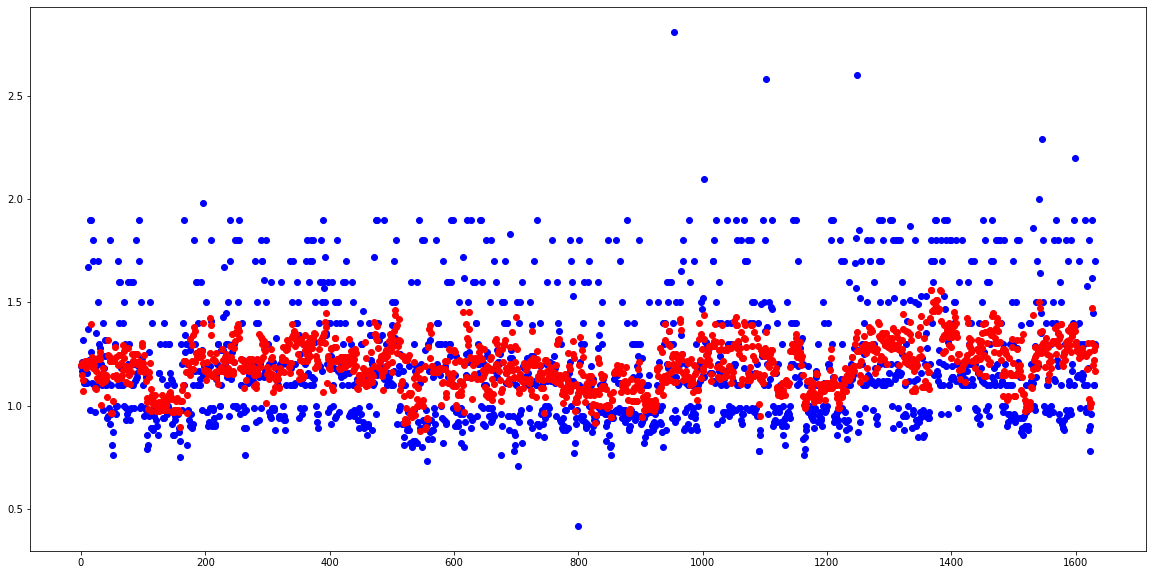

In [ ]:
idx = [int(x) for x in range(len(X))]
plt.figure(figsize=(20,10))
#plt.ylim(0.18, 1.65)
plt.scatter(idx,y, color='blue')
plt.scatter(idx,ykNNG_pred, color='red')